In [60]:
import lda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = lda.datasets.load_reuters()

In [3]:
X

array([[1, 0, 1, ..., 0, 0, 0],
       [7, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]], dtype=int32)

In [65]:
topK = pd.read_pickle("../data/topBagofWords50k.pickle").fillna(0)

In [66]:
df = pd.read_pickle("../data/lyrics_clean.pickle")

In [74]:
topK["get"] = 0
topK["got"] = 0
topK["like"] = 0
topK["let"] = 0

In [78]:
model = lda.LDA(n_topics=10, n_iter=3000, random_state=1)

In [79]:
model.fit(topK.values.astype(int))

INFO:lda:n_documents: 50000
INFO:lda:vocab_size: 2000
INFO:lda:n_words: 4829004
INFO:lda:n_topics: 10
INFO:lda:n_iter: 3000
INFO:lda:<0> log likelihood: -44746988
INFO:lda:<10> log likelihood: -37482596
INFO:lda:<20> log likelihood: -35439411
INFO:lda:<30> log likelihood: -35045186
INFO:lda:<40> log likelihood: -34872944
INFO:lda:<50> log likelihood: -34779933
INFO:lda:<60> log likelihood: -34710590
INFO:lda:<70> log likelihood: -34653741
INFO:lda:<80> log likelihood: -34624451
INFO:lda:<90> log likelihood: -34588150
INFO:lda:<100> log likelihood: -34563624
INFO:lda:<110> log likelihood: -34548499
INFO:lda:<120> log likelihood: -34534914
INFO:lda:<130> log likelihood: -34516041
INFO:lda:<140> log likelihood: -34499115
INFO:lda:<150> log likelihood: -34492561
INFO:lda:<160> log likelihood: -34485965
INFO:lda:<170> log likelihood: -34480229
INFO:lda:<180> log likelihood: -34474204
INFO:lda:<190> log likelihood: -34467519
INFO:lda:<200> log likelihood: -34468212
INFO:lda:<210> log likelih

INFO:lda:<1930> log likelihood: -34335595
INFO:lda:<1940> log likelihood: -34334074
INFO:lda:<1950> log likelihood: -34336209
INFO:lda:<1960> log likelihood: -34332122
INFO:lda:<1970> log likelihood: -34329316
INFO:lda:<1980> log likelihood: -34337911
INFO:lda:<1990> log likelihood: -34332700
INFO:lda:<2000> log likelihood: -34335964
INFO:lda:<2010> log likelihood: -34335182
INFO:lda:<2020> log likelihood: -34333584
INFO:lda:<2030> log likelihood: -34328723
INFO:lda:<2040> log likelihood: -34332451
INFO:lda:<2050> log likelihood: -34330137
INFO:lda:<2060> log likelihood: -34327039
INFO:lda:<2070> log likelihood: -34332257
INFO:lda:<2080> log likelihood: -34330533
INFO:lda:<2090> log likelihood: -34326850
INFO:lda:<2100> log likelihood: -34323740
INFO:lda:<2110> log likelihood: -34328697
INFO:lda:<2120> log likelihood: -34331015
INFO:lda:<2130> log likelihood: -34327940
INFO:lda:<2140> log likelihood: -34327483
INFO:lda:<2150> log likelihood: -34330101
INFO:lda:<2160> log likelihood: -3

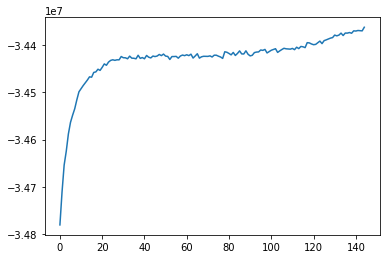

In [77]:
plt.plot(model.loglikelihoods_[5:])

In [71]:
topic_word = model.topic_word_  # model.components_ also works

In [72]:
n_top_words = 15
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(topK.keys())[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: oh hey ooh whoa yeah uh oo woah ay eh know ho ohh like
Topic 1: away take heart never fall time tri break noth leav know feel left go
Topic 2: love heart one give know feel never kiss make true ever forev like mine
Topic 3: life live world one us time peopl new see chang free make way stand
Topic 4: come back home go run around way round ride take road town citi know
Topic 5: day time one gone long night cri last everi away rememb still year miss
Topic 6: choru na im x dont vers u repeat cant know aint uh like ill
Topic 7: die burn blood fire dead kill death lie pain soul eye life hell end
Topic 8: god lord us heaven soul angel come jesu king pray name born sing call
Topic 9: feel see eye look dream hold wait like close keep light insid know find
Topic 10: nigga like get got fuck shit ya bitch em know caus yo money back
Topic 11: got said well one littl man like old two look big get head back
Topic 12: let go wanna tonight danc take get feel stop make come readi right night
To

In [37]:
doc_topic = model.doc_topic_

In [51]:
for i in range(10):
    songNum = np.random.randint(0,topK.shape[0])
    print('"{}" - {} (top topic: {})'.format(df["song"][songNum].replace("-"," "), df["artist"][songNum], doc_topic[songNum].argmax()))

"step of faith" - carman (top topic: 11)
"her devotion" - dreadful-shadows (top topic: 11)
"from the inside out" - for-king-country (top topic: 14)
"all the wrong places jack beats remix" - example (top topic: 7)
"vision" - funker-vogt (top topic: 3)
"in the depths of a labyrinth" - aurora-borealis (top topic: 9)
"that dont bother me" - catherine-britt (top topic: 12)
"this old heart of mine is weak for you" - diana-ross-the-supremes (top topic: 16)
"tabula rasa" - covenant (top topic: 3)
"that s what s up" - 50-cent (top topic: 15)
